In [ ]:
#Step 1: Sumilating the results of the original article, based on their parameters and features

In [5]:
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn
#!pip install scipy
#!pip install sklearn
!pip install -U scikit-learn
!pip install xgboost scikit-learn


In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [14]:
# how to read a CSV file:
df = pd.read_csv("Wednesday-workingHours.pcap_ISCX.csv")


In [15]:
df.isnull().any().any() # check if we have nan values.

True

In [16]:
#Replace infinite or very large values with NaN

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [17]:
#drop any instance that is missing a feture
df = df.dropna()
df.isnull().any().any() # check if we have nan values.

False

In [18]:
df.shape

(691406, 79)

In [19]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [20]:
# counting how many benigns and none benigns

label_counts = df[' Label'].value_counts()

# Print the count of 'benign' labels
if 'BENIGN' in label_counts:
    benign_count = label_counts['BENIGN']
    print(f"Number of 'benign' labels: {benign_count}")
else:
    print("There are no 'benign' labels in the DataFrame.")

# Print the count of labels other than 'benign'
non_benign_count = label_counts.drop('BENIGN', errors='ignore').sum()
print(f"Number of labels other than 'benign': {non_benign_count}")

Number of 'benign' labels: 439683
Number of labels other than 'benign': 251723


In [21]:
#save the labels column:
labels = df[" Label"]

In [22]:
labels.shape

(691406,)

In [23]:
#shows all unique labels:
unique_labels = df[' Label'].unique()
print(unique_labels)

['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [24]:
#Extracting the original paper's selected features into a new df:

# List of columns to include in the new DataFrame
selected_columns = [' Destination Port',' Bwd Packet Length Mean', ' Bwd Packet Length Std', 
                    ' Bwd Packets/s',' Packet Length Mean', ' Max Packet Length', 
                    ' Avg Bwd Segment Size', 'Init_Win_bytes_forward', ' Label']

# Create a new DataFrame with only the selected columns
df_step_one_features = df[selected_columns]

# Print the new DataFrame
df_step_one_features.head()

,Destination Port,Bwd Packet Length Mean,Bwd Packet Length Std,Bwd Packets/s,Packet Length Mean,Max Packet Length,Avg Bwd Segment Size,Init_Win_bytes_forward,Label
0,80,6.000000,0.000000,26.104208,6.000000,6,6.000000,255,BENIGN
1,389,65.200000,89.278777,10438.413360,29.294118,163,65.200000,29200,BENIGN
2,88,525.000000,813.326503,5479.452055,370.588235,1575,525.000000,29200,BENIGN
3,389,555.000000,977.480342,789.162173,337.066667,3069,555.000000,29200,BENIGN
4,88,525.333333,813.842901,5494.505495,393.875000,1576,525.333333,29200,BENIGN


In [25]:

# Print the count of 'benign' labels
label_counts = df_step_one_features[' Label'].value_counts()
if 'BENIGN' in label_counts:
    benign_count = label_counts['BENIGN']
    print(f"Number of 'benign' labels: {benign_count}")
else:
    print("There are no 'benign' labels in the DataFrame.")

# Print the count of labels other than 'benign'
non_benign_count = label_counts.drop('BENIGN', errors='ignore').sum()
print(f"Number of labels other than 'benign': {non_benign_count}")

Number of 'benign' labels: 439683
Number of labels other than 'benign': 251723


In [26]:
df_step_one_features.isnull().any().any() # check if we have nan values.

False

In [27]:
# drop the null lines:
df_step_one_features = df_step_one_features.dropna()

In [28]:
df_step_one_features.shape

(691406, 9)

In [29]:
# check data with models:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_step_one_features.drop(columns=[' Label'])  # Features
y = df_step_one_features[' Label']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
#RANDOMFOREST
# Import necessary libraries for models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

# Instantiate a model
rf_model = RandomForestClassifier(random_state=42, max_depth=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)


Random Forest Accuracy: 0.9969250979854339
Random Forest Precision: 0.9974464742262933
Random Forest Recall: 0.9969250979854339
Random Forest f1 score: 0.9968791252274811


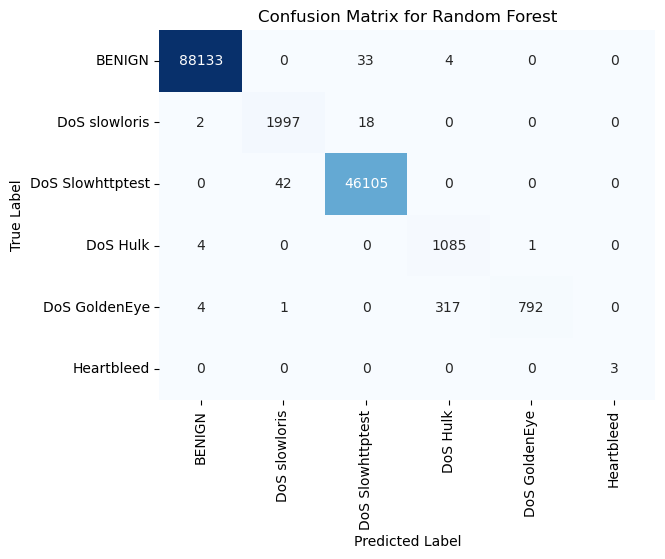

In [22]:
#RANDOMFOREST
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed']

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Precision:", precision_score(y_test, rf_predictions, average='weighted'))  # Specify the 'average' parameter
print("Random Forest Recall:", recall_score(y_test, rf_predictions, average='weighted'))  # Specify the 'average' parameter
print("Random Forest f1 score:", f1_score(y_test, rf_predictions, average='weighted'))  # Specify the 'average' parameter
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

# Create a heatmap with class labels
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
#ADABOOST
# Import necessary libraries for models
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

# Instantiate an Adaboost model with SAMME algorithm
ada_model = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions on the test set
ada_predictions = ada_model.predict(X_test)


AdaBoost Accuracy: 0.9693664691318815
AdaBoost Precision: 0.969454430606176
AdaBoost Recall: 0.9693664691318815
AdaBoost f1_score: 0.9662231557702335


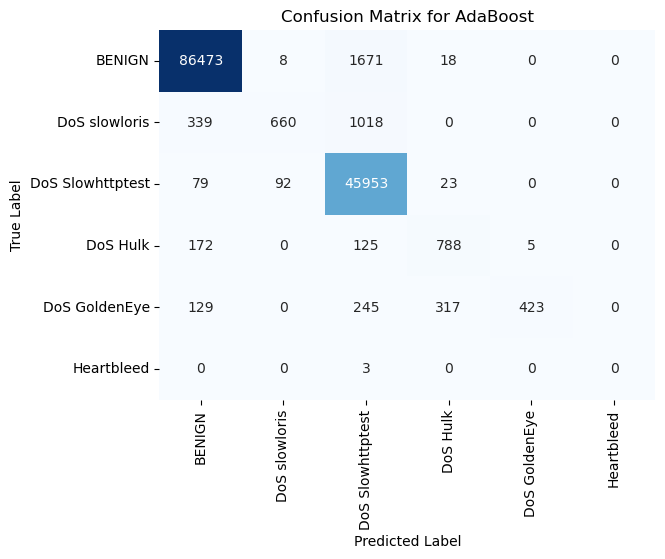

In [25]:
#ADABOOST
# Import necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = ['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed']

# Evaluate the model
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_predictions))
print("AdaBoost Precision:", precision_score(y_test, ada_predictions, average='weighted', zero_division=0))
print("AdaBoost Recall:", recall_score(y_test, ada_predictions, average='weighted', zero_division=0))
print("AdaBoost f1_score:", f1_score(y_test, ada_predictions, average='weighted', zero_division=0))
ada_conf_matrix = confusion_matrix(y_test, ada_predictions)

# Create a heatmap with class labels
sns.heatmap(ada_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [26]:
#XGBOOST
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Instantiate a model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
xgb_predictions_encoded = xgb_model.predict(X_test)


XGBoost Accuracy: 0.995986747605402
XGBoost Precision: 0.9965206633615776
XGBoost Recall: 0.995986747605402
XGBoost f1_score: 0.9959315070626761


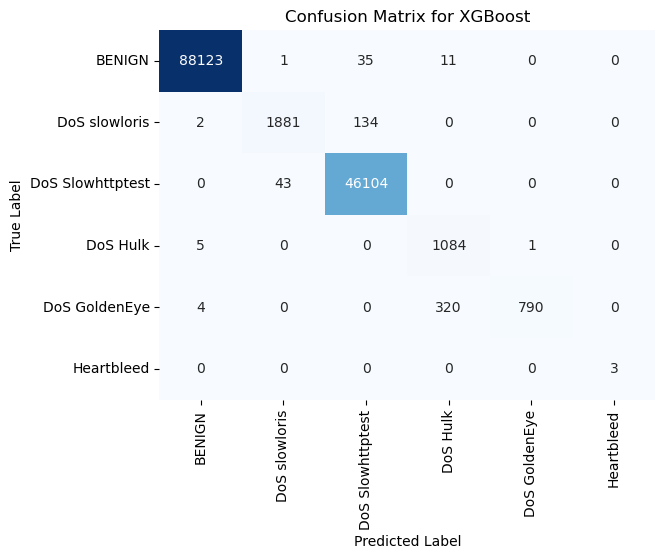

In [27]:
#XGBOOST
# Import necessary libraries for evaluation and visualization
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test_encoded, xgb_predictions_encoded))
print("XGBoost Precision:", precision_score(y_test_encoded, xgb_predictions_encoded, average='weighted'))
print("XGBoost Recall:", recall_score(y_test_encoded, xgb_predictions_encoded, average='weighted'))
print("XGBoost f1_score:", f1_score(y_test_encoded, xgb_predictions_encoded, average='weighted'))

# Create a confusion matrix with class labels
xgb_conf_matrix = confusion_matrix(y_test_encoded, xgb_predictions_encoded)

# Create a heatmap with class labels
sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [28]:
#MLP:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Instantiate MLP model
mlp_model = MLPClassifier(random_state=42)

# Train the model
mlp_model.fit(X_train, y_train_encoded)

# Make predictions on the test set
mlp_predictions_encoded = mlp_model.predict(X_test)

# Inverse transform the encoded predictions to get the original class labels
mlp_predictions = label_encoder.inverse_transform(mlp_predictions_encoded)


MLP Accuracy: 0.9822002150987794
MLP Precision: 0.982066098075105
MLP Recall: 0.9822002150987794
MLP f1_score: 0.9796926412573872


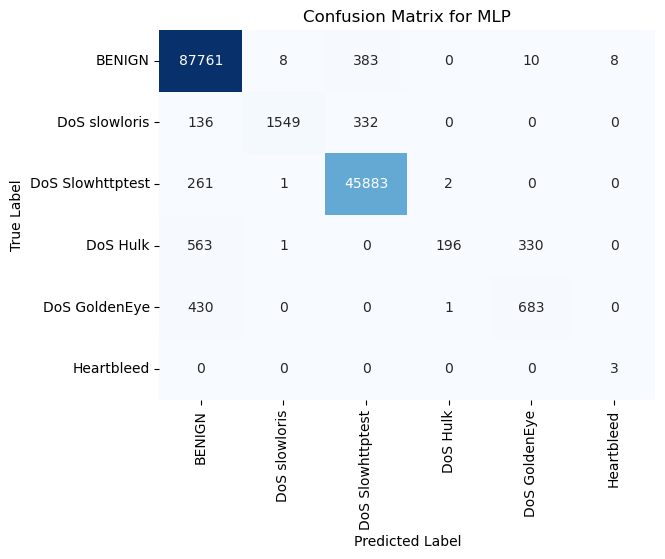

In [29]:
#MLP:
# Evaluate the model
print("MLP Accuracy:", accuracy_score(y_test, mlp_predictions))
print("MLP Precision:", precision_score(y_test, mlp_predictions, average='weighted'))
print("MLP Recall:", recall_score(y_test, mlp_predictions, average='weighted'))
print("MLP f1_score:", f1_score(y_test, mlp_predictions, average='weighted'))

# Create a confusion matrix with class labels
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)

# Create a heatmap with class labels
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

